In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load data
all_crime = pd.read_table('results/all_offense_borough.out',sep='\t', \
                          header=None, names=['Borough','Count']) \
                          .sort_values(by='Count')


hourly_crime_from = pd.read_table('results/all_offense_hour_from.out', \
                                  delimiter='\t', names=['Hour','Count']) \
                                  .loc[1:24,:]

hourly_crime_to = pd.read_table('results/all_offense_hour_to.out', \
                                delimiter='\t',names=['Hour','Count']) \
                                .loc[1:24,:]

level_crime = pd.read_table('results/crime_level_boro.out',sep='\t', \
                            header=None,names=['Level','Borough','Count']) \
                            .sort_values(by='Count')

hlc = pd.read_table('results/crime_level_hour.out', \
                    delimiter='\t',names=['Level','Hour','Count']) \
                    .sort_values(by='Count').dropna()
hourly_level_crime = hlc.loc[hlc['Hour']!=24]
    
monthly_level_crime = pd.read_table('results/crime_level_month.out', \
                                    delimiter='\t',names=['Level','Month','Count']) \
                                    .sort_values(by='Count')
    
# Load year data from 2006
ylc = pd.read_table('results/crime_level_year.out', \
                   delimiter='\t',names=['Level','Year','Count'])
yearly_level_crime = ylc.loc[ylc['Year']>=2006].sort_values(by='Count')


# PLOTS

## Crime in Different Boroughs

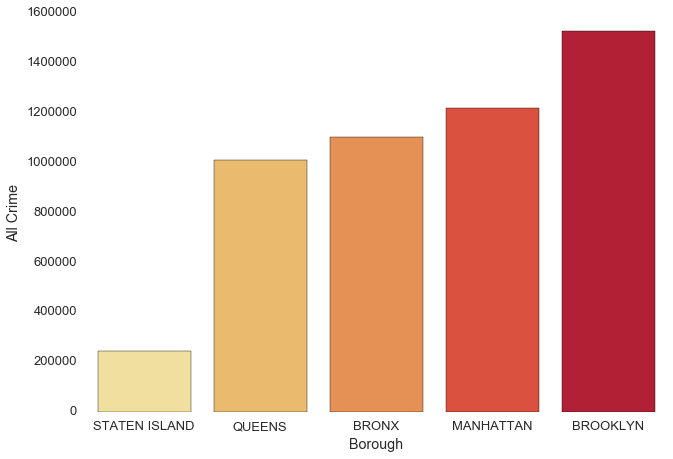

In [4]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
fig, ax = plt.subplots()

sns.barplot(all_crime['Borough'], all_crime['Count'], palette="YlOrRd")
ax.set_ylabel("All Crime")

# Finalize the plot
sns.despine(bottom=True, left=True)

#plt.setp(fig.axes, yticks=[]) # Remove y-labels

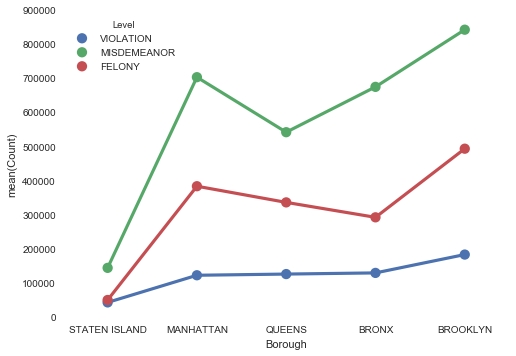

In [5]:
sns.set(style="white", context="notebook")
sns.pointplot(x="Borough", y="Count", hue="Level", data=level_crime)
sns.despine(bottom=True, left=True)

## Crime throughout the day

### Hourly_from

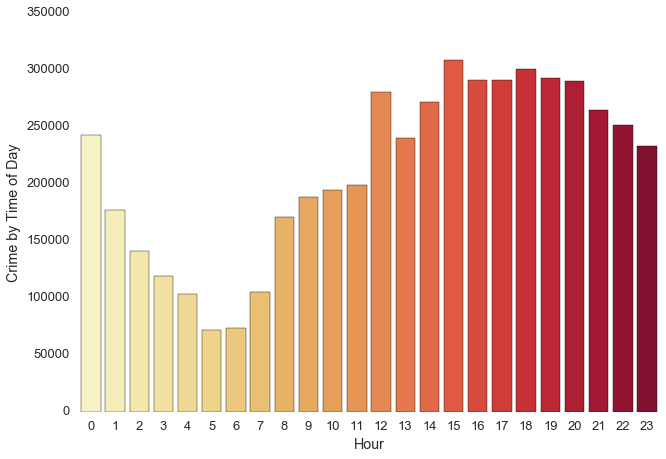

In [6]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
fig, ax = plt.subplots()

sns.set_palette(sns.color_palette("muted", desat=.4))
sns.barplot(hourly_crime_from['Hour'], hourly_crime_from['Count'], palette="YlOrRd")

ax.set_ylabel("Crime by Time of Day")

# Finalize the plot
sns.despine(bottom=True, left=True)
#plt.setp(fig.axes, yticks=[]) # Remove y-labels

### Hourly_to

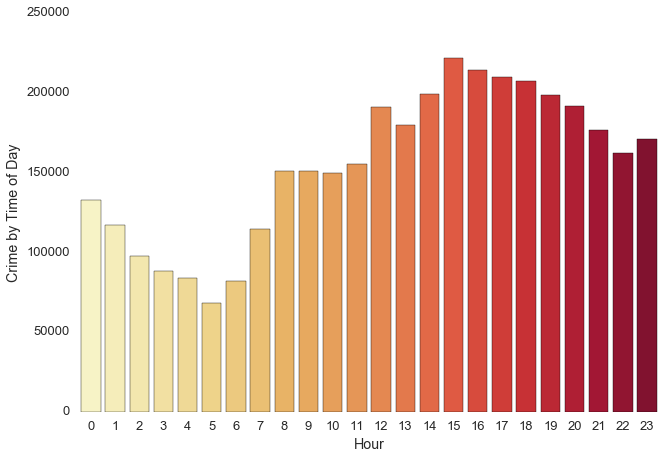

In [7]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
fig, ax = plt.subplots()

sns.barplot(hourly_crime_to['Hour'], hourly_crime_to['Count'], palette="YlOrRd")
ax.set_ylabel("Crime by Time of Day")

# Finalize the plot
sns.despine(bottom=True, left=True)
#plt.setp(fig.axes, yticks=[]) # Remove y-labels

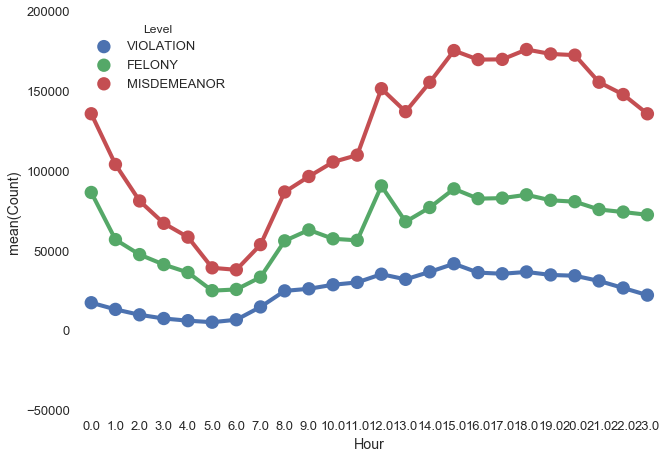

In [8]:
sns.set(style="white", context="talk")
sns.pointplot(x="Hour", y="Count", hue="Level", data=hourly_level_crime)
sns.despine(bottom=True, left=True)

## Crime throughout the Year

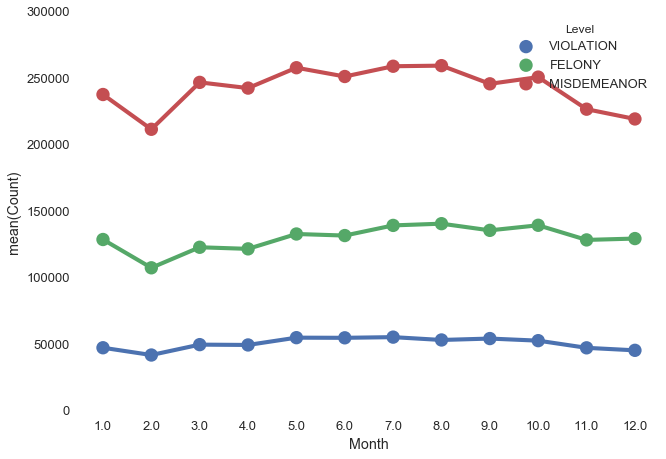

In [9]:
sns.set(style="white", context="talk")
sns.pointplot(x="Month", y="Count", hue="Level", data=monthly_level_crime)
sns.despine(bottom=True, left=True)

## Crime in the Last Decade

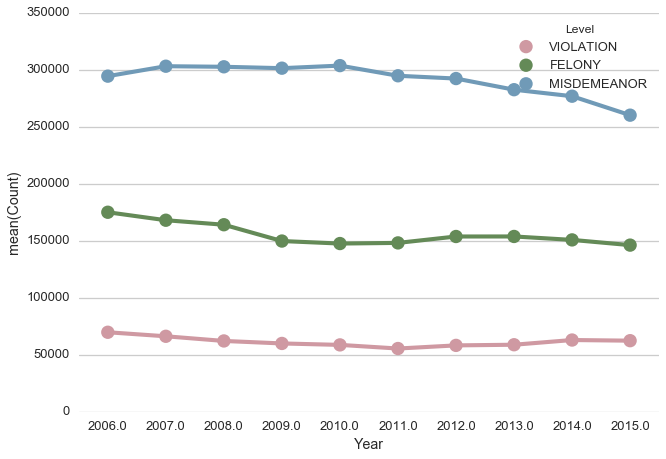

In [13]:
sns.set(style="whitegrid", context="talk")
sns.set_palette(sns.color_palette("husl", n_colors=3, desat=.4),n_colors=3)
sns.pointplot(x="Year", y="Count", hue="Level", data=yearly_level_crime)
sns.despine(bottom=True, left=True)

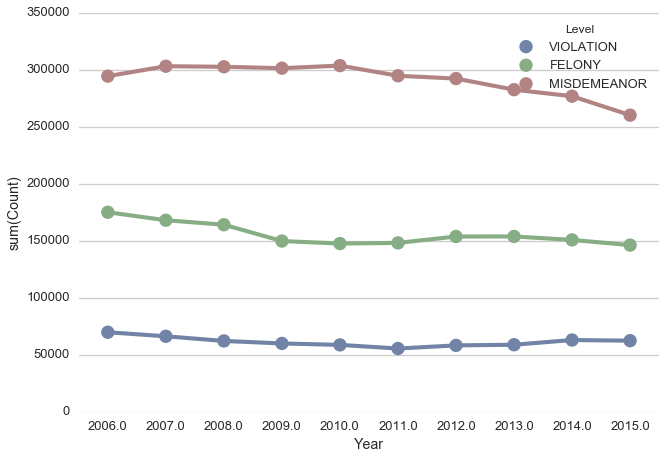

In [12]:
sns.set(style="whitegrid", context="talk")
sns.set_palette(sns.color_palette("muted", desat=.4))
sns.pointplot(x="Year", y="Count", hue="Level", data=yearly_level_crime,estimator=sum)
sns.despine(bottom=True, left=True)